### Regressão Linear

#### O que é o modelo de Regressão Linear?

É um instrumento estatístico que consiste em um conjunto de técnicas baseadas na ideia de estimar o valor de uma variável de resultado por meio dos valores de outras variáveis denominadas preditoras. Desta forma, em Machine Learning este algoritmo supervisionado é utilizado para fazer análises preditivas.

#### Importação das bibliotecas e funções, coleta e tratamento dos dados

In [1]:
import pandas as pd #importa a biblioteca pandas para análise e manipulação de dados
from sklearn.model_selection import train_test_split #importa a função train_test_split para dividir um conjunto de dados em treino e teste
from sklearn.metrics import mean_squared_error #importa a função mean_squared_error utilizada como métrica para determinar o desempenho de um algoritmo
import seaborn as sns # importa a biblioteca seaborn para visualização de dados
import matplotlib.pyplot as plt #importa a bliblioteca matplotlib para visualização de dados
from sklearn.linear_model import LinearRegression #importa a função LinearRegression para cálculo da Regressão Linear dos Mínimos Quadrados Ordinário

#criando o DataFrame "df_chem"
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
df_chem
df_chem, dados_categoricos

df_remove=df_chem.loc[(df_chem["Refractive Index"] == 0.000)] #remove as linhas (objetos), cujo valor do índice de refração é 0

df_chem = df_chem.drop(df_remove.index) #considera que o dataframe df_chem é o dataframe com as linhas removidas
print(df_chem)

     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density  
0        0.123390               5.498  
1        0.056083               6.439  
2        0.122631               6.234  

#### Definição de parâmetros para teste e treino dos dados

In [2]:
tamanho = 0.25 # Fração de dados escolhida para treino e teste
seed = 567 # Determina o ponto onde será feita a separação dos dados

i = df_chem.index # encontra a posição do índice de um elemento na lista de dados
i_treino, i_teste = train_test_split(i, test_size=tamanho, random_state = seed)

#Definindo o acesso ao grupo de linhas que serão usandos para treino e teste
df_treino = df_chem.loc[i_treino]
df_teste = df_chem.loc[i_teste]

print(df_treino)
print()
print(df_teste)

     Mohs Hardness  Specific Gravity  Refractive Index   Molar Mass  \
615           0.00             5.700             1.737   298.038100   
194           5.50             4.650             2.120   123.842500   
306           4.50             2.285             1.516   257.230046   
82            0.00             4.380             1.793   426.292200   
339           3.00             6.420             2.358  1560.452603   
..             ...               ...               ...          ...   
64            2.50             1.715             1.513   155.071500   
29            6.25             2.625             1.535   411.331124   
762           5.50             0.000             1.495   340.284075   
367           1.00             3.197             1.641   490.595370   
250           5.00             4.535             2.069   656.503600   

     Molar Volume  Calculated Density  
615      0.033606               7.361  
194      0.011210               9.169  
306      0.033718          

#### Definição de atributos e target para Regressão Linear

In [3]:
# Modelo preditivo para Regressão Linear

nome = 'df_chem'
atributos = ["Specific Gravity", "Mohs Hardness", 'Molar Mass', 'Molar Volume', 'Calculated Density']
target = ["Refractive Index"]

# Define variáveis para os dados de treino e teste, e retorna com a lista de valores dos dados
X_treino = df_treino.reindex(atributos, axis=1).values
y_treino = df_treino.reindex(target, axis=1).values
X_teste = df_teste.reindex(atributos, axis=1).values
y_teste = df_teste.reindex(target, axis=1).values

In [4]:
# Modelo linear para compararmos com nossa Baseline

linear = LinearRegression() # Criação do Modelo Linear

linear.fit(X_treino, y_treino) # Treinamento do Modelo Linear

previsao_linear = linear.predict(X_teste) # Previsão do modelo linear a partir do treino

#print(previsao_linear)

In [5]:
print(linear.__doc__)
print(linear.fit.__doc__)


    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    normalize : bool, default=False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
        on an estimator with ``normalize=False``.

    copy_X : bool, default=True
        If True, X will be copie

In [6]:
# Comparação se foi melhor ou não

y_verdadeiro = y_teste
y_previsao = linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f'A RMSE do modelo linear foi uma Indice Refrativo de {RMSE}')

A RMSE do modelo linear foi uma Indice Refrativo de 0.2354673749765964


#### Em comparação com o modelo baseline (0.2560), o RMSE da Regressão Linear não foi absurdamente menor.

Text(0, 0.5, 'Previsão')

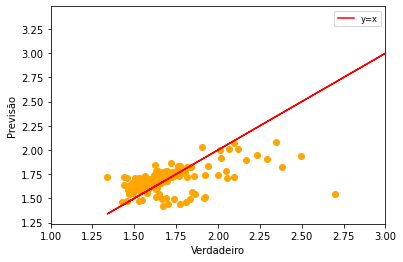

In [7]:
# Visualização da Regressão Linear

import matplotlib.pyplot as plt
fig, ax2 = plt.subplots(1,1)
ax2.scatter(y_verdadeiro, y_previsao, c = 'orange')
ax2.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax2.legend(fontsize='small')
ax2.set_xlim(1,3)
if target ==  'Refractive Index':
    ax2.set_title('')
ax2.set_xlabel('Verdadeiro')
ax2.set_ylabel('Previsão')

In [8]:
print(ax2.scatter.__doc__, ax2.set_xlim)

A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : array-like or list of colors or color, optional
    The marker colors. Possible values:

    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2D array in which the rows are RGB or RGBA.
    - A sequence of colors of length n.
    - A single color format string.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an array of values to be
    colormapped. If you want to specify the same RGB or RGBA value for
    all points, use a 2D array with a single row.  Otherwise, value-
    matching will have precedence in case of a size matching with *x*
    and *y*.

    If you wish to specify a 

#### Normalização dos dados

A normalização dos dados é uma técnica aplicada na preparação dos dados com o objetivo de colocá-los em um intervalo de escala comum, que varia entre 0 e 1 para valores positivos ou -1 e 1 para valores negativos, o que pode impactar na acurácia da Regressão Linear.

In [9]:
# Função para normalizar os dados
def normalizar(df):
    resultado = df.copy()
    for coluna in df.columns:
        if df[coluna].max() == 0:
            continue
        else:
            valor_max = df[coluna].max()
            valor_min = df[coluna].min()
            resultado[coluna] = (df[coluna] - valor_min) / (valor_max - valor_min)
    return resultado

In [10]:
df_normalizado = normalizar(df_chem)
df_normalizado

,Mohs Hardness,Specific Gravity,Refractive Index,Molar Mass,Molar Volume,Calculated Density
0,0.473684,0.337746,0.246867,0.195427,0.093724,0.366797
1,0.289474,0.359220,0.251880,0.101141,0.037575,0.437773
2,0.210526,0.460753,0.457811,0.221018,0.093091,0.422311
4,0.578947,0.109455,0.269424,0.206242,0.084284,0.433172
5,0.368421,0.343480,0.195489,0.049480,0.028236,0.266782
...,...,...,...,...,...,...
803,0.789474,0.484728,0.392231,0.123579,0.056249,0.371776
805,0.684211,0.336704,0.297828,0.087404,0.074954,0.187509
806,0.368421,0.227249,0.251044,0.115402,0.056331,0.344848
807,0.736842,0.355572,0.253551,0.058843,0.065417,0.136597


#### Regressão Linear com os dados normalizados

In [11]:
tamanho = 0.25 # Fração de dados escolhida para treino e teste
seed = 2000 # Determina o ponto onde será feita a separação dos dados

i = df_normalizado.index
i_treino, i_teste = train_test_split(i, test_size=tamanho, random_state = seed)

df_treino = df_normalizado.loc[i_treino]
df_teste = df_normalizado.loc[i_teste]

print(df_treino)
print()
print(df_teste)

     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
279       0.350526          0.314813          0.267335    0.171292   
192       0.000000          0.297092          0.267335    0.028865   
236       0.342105          0.641092          0.533835    0.089664   
193       0.657895          0.331492          0.268170    0.057183   
431       0.631579          0.271031          0.220969    0.143326   
..             ...               ...               ...         ...   
237       0.263158          0.000000          0.268170    0.310767   
557       0.631579          0.376003          0.313701    0.017547   
378       0.315789          0.323152          0.324979    0.037246   
775       0.157895          0.427395          0.256057    0.121201   
263       0.684211          0.000000          0.246032    0.038492   

     Molar Volume  Calculated Density  
279      0.075022            0.398175  
192      0.018848            0.216473  
236      0.018854            0.675140  

In [12]:
# Modelo preditivo de regressão linear normalizado

nome = 'df_normalizado'
atributos = ["Mohs Hardness","Specific Gravity", 'Molar Mass', 'Molar Volume', 'Calculated Density']
target = ["Refractive Index"]

X_treinoN = df_treino.reindex(atributos, axis=1).values
y_treinoN = df_treino.reindex(target, axis=1).values
X_testeN = df_teste.reindex(atributos, axis=1).values
y_testeN = df_teste.reindex(target, axis=1).values

In [13]:
linear = LinearRegression() # Criação do Modelo Linear

linear.fit(X_treinoN, y_treinoN) # Treinamento do Modelo Linear

previsao_linear = linear.predict(X_testeN) # Previsão do modelo linear a partir do treino

#print(previsao_linear)

In [14]:
# Raiz quadrada do erro quadrático médio para a regressão normalizada

y_verdadeiroN = y_testeN
y_previsaoN = linear.predict(X_testeN)

RMSE = mean_squared_error(y_verdadeiroN, y_previsaoN, squared=False)
print(f'A RMSE de Regressão linear normalizada foi uma Indice Refrativo de {RMSE}')

A RMSE de Regressão linear normalizada foi uma Indice Refrativo de 0.06828991256016625


**Com relação ao RMSE do modelo baseline, houve uma redução ainda maior**

Text(0, 0.5, 'Previsão')

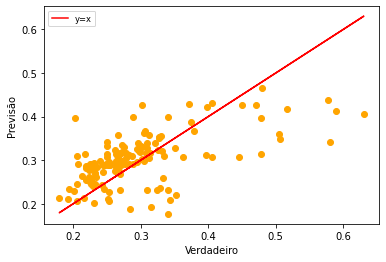

In [15]:
fig, ax2 = plt.subplots(1,1)
ax2.scatter(y_verdadeiroN, y_previsaoN, c = 'orange')
ax2.plot(y_verdadeiroN,y_verdadeiroN,label="y=x", c = 'r') ; ax2.legend(fontsize='small')
if target ==  'Refractive Index':
    ax2.set_title('')
ax2.set_xlabel('Verdadeiro')
ax2.set_ylabel('Previsão')